# Interpretability and Causality in Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Dataset

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
y # Disease progression after 1 year.

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
X.mean()

age   -1.444295e-18
sex    2.543215e-18
bmi   -2.255925e-16
bp    -4.854086e-17
s1    -1.428596e-17
s2     3.898811e-17
s3    -6.028360e-18
s4    -1.788100e-17
s5     9.243486e-17
s6     1.351770e-17
dtype: float64

In [5]:
X.std()

age    0.047619
sex    0.047619
bmi    0.047619
bp     0.047619
s1     0.047619
s2     0.047619
s3     0.047619
s4     0.047619
s5     0.047619
s6     0.047619
dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

y_norm = StandardScaler().fit_transform(y.values.reshape(-1, 1))
y_norm = pd.Series(y_norm[:, 0], name=y.name) * 0.047619

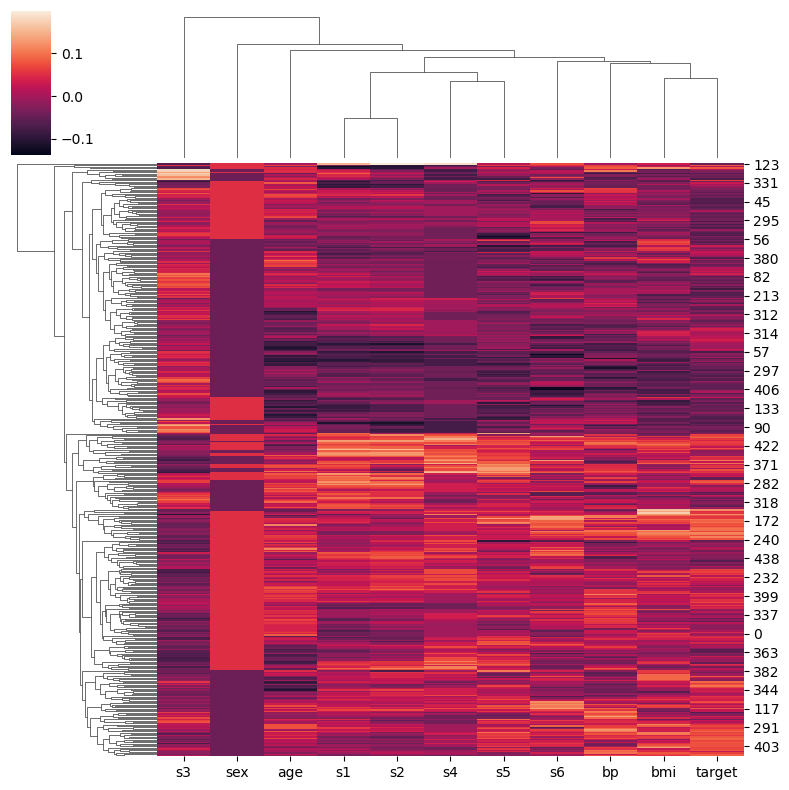

In [7]:
sns.clustermap(pd.concat([X, y_norm], axis=1), figsize=(8, 8))
plt.show()

## Linear model

In [8]:
from statsmodels.api import OLS

lr = OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Sun, 05 May 2024   Prob (F-statistic):                    4.72e-07
Time:                        21:17:47   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.0099    179.967     -0.056      0.956    -363.729     343.709
sex         -239.8156    184.404     -1.300      0.194    -602.255     122.624
bmi          519.8459    200.401      2.594      0.010     125.964     913.728
bp           324.3846    197.053      1.646      0.100     -62.917     711.687
s1          -792.1756   1255.052     -0.631      0.528   -3258.944    1674.593
s2           476.7390   1021.170      0.467      0.641   -1530.341    2483.819
s3           101.0433    640.151      0.158      0.875   -1157.155    1359.242
s4           177.0632    486.370      0.364      0.716    -778.883    1133.009
s5           751.2737    517.768      1.451      0.148    -266.384    1768.931
s6            67.6267    198.747      0.340      0.734    -323.004     458.257
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Neural network

In [9]:
import keras
from keras import layers

nn = keras.Sequential([
    layers.Dropout(0.8),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')
])

nn.compile(optimizer='adam', loss='mse', metrics='RootMeanSquaredError')

In [10]:
history = nn.fit(X, y, epochs=1000)

Epoch 1/1000
14/14 [==============================] - 1s 11ms/step - loss: 29041.7891 - root_mean_squared_error: 170.4165
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 29006.8027 - root_mean_squared_error: 170.3138
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 28943.0117 - root_mean_squared_error: 170.1265
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 28880.6016 - root_mean_squared_error: 169.9429
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 28762.5020 - root_mean_squared_error: 169.5951
Epoch 6/1000
14/14 [==============================] - 0s 3ms/step - loss: 28626.5527 - root_mean_squared_error: 169.1938
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 28425.4766 - root_mean_squared_error: 168.5986
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 28217.0898 - root_mean_squared_error: 167.9794
Epoch 9/1000
14/14 [===========

14/14 [==============================] - 0s 2ms/step - loss: 9466.0869 - root_mean_squared_error: 97.2938
Epoch 69/1000
14/14 [==============================] - 0s 2ms/step - loss: 11508.3408 - root_mean_squared_error: 107.2769
Epoch 70/1000
14/14 [==============================] - 0s 2ms/step - loss: 9588.9551 - root_mean_squared_error: 97.9232
Epoch 71/1000
14/14 [==============================] - 0s 2ms/step - loss: 10989.9551 - root_mean_squared_error: 104.8330
Epoch 72/1000
14/14 [==============================] - 0s 2ms/step - loss: 9967.0566 - root_mean_squared_error: 99.8351
Epoch 73/1000
14/14 [==============================] - 0s 2ms/step - loss: 10064.2910 - root_mean_squared_error: 100.3209
Epoch 74/1000
14/14 [==============================] - 0s 2ms/step - loss: 9612.7832 - root_mean_squared_error: 98.0448
Epoch 75/1000
14/14 [==============================] - 0s 2ms/step - loss: 9472.1045 - root_mean_squared_error: 97.3247
Epoch 76/1000
14/14 [===========================

14/14 [==============================] - 0s 2ms/step - loss: 9225.8945 - root_mean_squared_error: 96.0515
Epoch 136/1000
14/14 [==============================] - 0s 2ms/step - loss: 8996.0977 - root_mean_squared_error: 94.8478
Epoch 137/1000
14/14 [==============================] - 0s 2ms/step - loss: 8200.7080 - root_mean_squared_error: 90.5578
Epoch 138/1000
14/14 [==============================] - 0s 2ms/step - loss: 9465.5811 - root_mean_squared_error: 97.2912
Epoch 139/1000
14/14 [==============================] - 0s 2ms/step - loss: 8771.2861 - root_mean_squared_error: 93.6551
Epoch 140/1000
14/14 [==============================] - 0s 2ms/step - loss: 9182.2998 - root_mean_squared_error: 95.8243
Epoch 141/1000
14/14 [==============================] - 0s 2ms/step - loss: 8987.8877 - root_mean_squared_error: 94.8045
Epoch 142/1000
14/14 [==============================] - 0s 2ms/step - loss: 8977.9004 - root_mean_squared_error: 94.7518
Epoch 143/1000
14/14 [=========================

14/14 [==============================] - 0s 3ms/step - loss: 9760.3398 - root_mean_squared_error: 98.7944
Epoch 203/1000
14/14 [==============================] - 0s 3ms/step - loss: 8530.0703 - root_mean_squared_error: 92.3584
Epoch 204/1000
14/14 [==============================] - 0s 2ms/step - loss: 8397.7119 - root_mean_squared_error: 91.6390
Epoch 205/1000
14/14 [==============================] - 0s 2ms/step - loss: 9683.8164 - root_mean_squared_error: 98.4064
Epoch 206/1000
14/14 [==============================] - 0s 2ms/step - loss: 9155.3545 - root_mean_squared_error: 95.6836
Epoch 207/1000
14/14 [==============================] - 0s 2ms/step - loss: 9946.2510 - root_mean_squared_error: 99.7309
Epoch 208/1000
14/14 [==============================] - 0s 2ms/step - loss: 8821.4492 - root_mean_squared_error: 93.9226
Epoch 209/1000
14/14 [==============================] - 0s 3ms/step - loss: 9175.9844 - root_mean_squared_error: 95.7914
Epoch 210/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8659.0742 - root_mean_squared_error: 93.0541
Epoch 270/1000
14/14 [==============================] - 0s 2ms/step - loss: 8574.5342 - root_mean_squared_error: 92.5988
Epoch 271/1000
14/14 [==============================] - 0s 2ms/step - loss: 8697.2588 - root_mean_squared_error: 93.2591
Epoch 272/1000
14/14 [==============================] - 0s 2ms/step - loss: 9063.1904 - root_mean_squared_error: 95.2008
Epoch 273/1000
14/14 [==============================] - 0s 2ms/step - loss: 8754.0088 - root_mean_squared_error: 93.5629
Epoch 274/1000
14/14 [==============================] - 0s 2ms/step - loss: 8758.3672 - root_mean_squared_error: 93.5862
Epoch 275/1000
14/14 [==============================] - 0s 2ms/step - loss: 9198.6367 - root_mean_squared_error: 95.9095
Epoch 276/1000
14/14 [==============================] - 0s 2ms/step - loss: 9788.7354 - root_mean_squared_error: 98.9380
Epoch 277/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8247.4912 - root_mean_squared_error: 90.8157
Epoch 337/1000
14/14 [==============================] - 0s 2ms/step - loss: 8671.8496 - root_mean_squared_error: 93.1228
Epoch 338/1000
14/14 [==============================] - 0s 2ms/step - loss: 8721.9199 - root_mean_squared_error: 93.3912
Epoch 339/1000
14/14 [==============================] - 0s 2ms/step - loss: 9258.8271 - root_mean_squared_error: 96.2228
Epoch 340/1000
14/14 [==============================] - 0s 2ms/step - loss: 8483.2598 - root_mean_squared_error: 92.1046
Epoch 341/1000
14/14 [==============================] - 0s 2ms/step - loss: 9497.2578 - root_mean_squared_error: 97.4539
Epoch 342/1000
14/14 [==============================] - 0s 2ms/step - loss: 8920.6016 - root_mean_squared_error: 94.4489
Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 8382.7383 - root_mean_squared_error: 91.5573
Epoch 344/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8240.2656 - root_mean_squared_error: 90.7759
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 8522.3809 - root_mean_squared_error: 92.3167
Epoch 405/1000
14/14 [==============================] - 0s 2ms/step - loss: 8824.4824 - root_mean_squared_error: 93.9387
Epoch 406/1000
14/14 [==============================] - 0s 2ms/step - loss: 8067.7871 - root_mean_squared_error: 89.8209
Epoch 407/1000
14/14 [==============================] - 0s 2ms/step - loss: 8458.2695 - root_mean_squared_error: 91.9688
Epoch 408/1000
14/14 [==============================] - 0s 2ms/step - loss: 9143.1973 - root_mean_squared_error: 95.6201
Epoch 409/1000
14/14 [==============================] - 0s 2ms/step - loss: 8771.8467 - root_mean_squared_error: 93.6581
Epoch 410/1000
14/14 [==============================] - 0s 2ms/step - loss: 8210.1006 - root_mean_squared_error: 90.6096
Epoch 411/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 9149.9951 - root_mean_squared_error: 95.6556
Epoch 471/1000
14/14 [==============================] - 0s 2ms/step - loss: 7978.9717 - root_mean_squared_error: 89.3251
Epoch 472/1000
14/14 [==============================] - 0s 2ms/step - loss: 8732.1240 - root_mean_squared_error: 93.4458
Epoch 473/1000
14/14 [==============================] - 0s 2ms/step - loss: 8688.2764 - root_mean_squared_error: 93.2109
Epoch 474/1000
14/14 [==============================] - 0s 2ms/step - loss: 8871.9766 - root_mean_squared_error: 94.1912
Epoch 475/1000
14/14 [==============================] - 0s 2ms/step - loss: 8890.9375 - root_mean_squared_error: 94.2918
Epoch 476/1000
14/14 [==============================] - 0s 2ms/step - loss: 9086.8730 - root_mean_squared_error: 95.3251
Epoch 477/1000
14/14 [==============================] - 0s 2ms/step - loss: 9497.8242 - root_mean_squared_error: 97.4568
Epoch 478/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 9049.9766 - root_mean_squared_error: 95.1314
Epoch 538/1000
14/14 [==============================] - 0s 2ms/step - loss: 8242.2227 - root_mean_squared_error: 90.7867
Epoch 539/1000
14/14 [==============================] - 0s 2ms/step - loss: 9234.0322 - root_mean_squared_error: 96.0939
Epoch 540/1000
14/14 [==============================] - 0s 2ms/step - loss: 8524.5703 - root_mean_squared_error: 92.3286
Epoch 541/1000
14/14 [==============================] - 0s 2ms/step - loss: 8509.5801 - root_mean_squared_error: 92.2474
Epoch 542/1000
14/14 [==============================] - 0s 2ms/step - loss: 8359.6172 - root_mean_squared_error: 91.4309
Epoch 543/1000
14/14 [==============================] - 0s 2ms/step - loss: 8784.4785 - root_mean_squared_error: 93.7255
Epoch 544/1000
14/14 [==============================] - 0s 2ms/step - loss: 9811.6123 - root_mean_squared_error: 99.0536
Epoch 545/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8373.9756 - root_mean_squared_error: 91.5094
Epoch 605/1000
14/14 [==============================] - 0s 2ms/step - loss: 8762.4736 - root_mean_squared_error: 93.6081
Epoch 606/1000
14/14 [==============================] - 0s 2ms/step - loss: 8086.3511 - root_mean_squared_error: 89.9241
Epoch 607/1000
14/14 [==============================] - 0s 2ms/step - loss: 8968.0381 - root_mean_squared_error: 94.6997
Epoch 608/1000
14/14 [==============================] - 0s 2ms/step - loss: 8744.1914 - root_mean_squared_error: 93.5104
Epoch 609/1000
14/14 [==============================] - 0s 2ms/step - loss: 8615.3262 - root_mean_squared_error: 92.8188
Epoch 610/1000
14/14 [==============================] - 0s 2ms/step - loss: 8814.0479 - root_mean_squared_error: 93.8832
Epoch 611/1000
14/14 [==============================] - 0s 2ms/step - loss: 8432.2119 - root_mean_squared_error: 91.8271
Epoch 612/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8097.6221 - root_mean_squared_error: 89.9868
Epoch 672/1000
14/14 [==============================] - 0s 2ms/step - loss: 9101.3301 - root_mean_squared_error: 95.4009
Epoch 673/1000
14/14 [==============================] - 0s 2ms/step - loss: 8997.3447 - root_mean_squared_error: 94.8543
Epoch 674/1000
14/14 [==============================] - 0s 2ms/step - loss: 9661.3760 - root_mean_squared_error: 98.2923
Epoch 675/1000
14/14 [==============================] - 0s 2ms/step - loss: 8935.1318 - root_mean_squared_error: 94.5258
Epoch 676/1000
14/14 [==============================] - 0s 2ms/step - loss: 9219.9980 - root_mean_squared_error: 96.0208
Epoch 677/1000
14/14 [==============================] - 0s 2ms/step - loss: 8995.6914 - root_mean_squared_error: 94.8456
Epoch 678/1000
14/14 [==============================] - 0s 2ms/step - loss: 8515.9111 - root_mean_squared_error: 92.2817
Epoch 679/1000
14/14 [=========================

14/14 [==============================] - 0s 3ms/step - loss: 9013.0410 - root_mean_squared_error: 94.9370
Epoch 739/1000
14/14 [==============================] - 0s 3ms/step - loss: 9183.8066 - root_mean_squared_error: 95.8322
Epoch 740/1000
14/14 [==============================] - 0s 3ms/step - loss: 9229.3955 - root_mean_squared_error: 96.0697
Epoch 741/1000
14/14 [==============================] - 0s 2ms/step - loss: 8894.9912 - root_mean_squared_error: 94.3133
Epoch 742/1000
14/14 [==============================] - 0s 3ms/step - loss: 8962.1924 - root_mean_squared_error: 94.6689
Epoch 743/1000
14/14 [==============================] - 0s 3ms/step - loss: 8267.9404 - root_mean_squared_error: 90.9282
Epoch 744/1000
14/14 [==============================] - 0s 2ms/step - loss: 8383.1777 - root_mean_squared_error: 91.5597
Epoch 745/1000
14/14 [==============================] - 0s 3ms/step - loss: 9443.7842 - root_mean_squared_error: 97.1791
Epoch 746/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8463.7285 - root_mean_squared_error: 91.9985
Epoch 806/1000
14/14 [==============================] - 0s 2ms/step - loss: 8940.5840 - root_mean_squared_error: 94.5547
Epoch 807/1000
14/14 [==============================] - 0s 2ms/step - loss: 8557.4434 - root_mean_squared_error: 92.5064
Epoch 808/1000
14/14 [==============================] - 0s 2ms/step - loss: 8664.3896 - root_mean_squared_error: 93.0827
Epoch 809/1000
14/14 [==============================] - 0s 2ms/step - loss: 8710.4102 - root_mean_squared_error: 93.3296
Epoch 810/1000
14/14 [==============================] - 0s 2ms/step - loss: 8399.2920 - root_mean_squared_error: 91.6477
Epoch 811/1000
14/14 [==============================] - 0s 2ms/step - loss: 8704.4365 - root_mean_squared_error: 93.2976
Epoch 812/1000
14/14 [==============================] - 0s 2ms/step - loss: 9402.0518 - root_mean_squared_error: 96.9642
Epoch 813/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8479.5420 - root_mean_squared_error: 92.0844
Epoch 873/1000
14/14 [==============================] - 0s 2ms/step - loss: 8025.7349 - root_mean_squared_error: 89.5865
Epoch 874/1000
14/14 [==============================] - 0s 2ms/step - loss: 8672.4590 - root_mean_squared_error: 93.1260
Epoch 875/1000
14/14 [==============================] - 0s 2ms/step - loss: 8446.9551 - root_mean_squared_error: 91.9073
Epoch 876/1000
14/14 [==============================] - 0s 2ms/step - loss: 9127.9395 - root_mean_squared_error: 95.5403
Epoch 877/1000
14/14 [==============================] - 0s 2ms/step - loss: 9075.3877 - root_mean_squared_error: 95.2648
Epoch 878/1000
14/14 [==============================] - 0s 2ms/step - loss: 8221.9912 - root_mean_squared_error: 90.6752
Epoch 879/1000
14/14 [==============================] - 0s 2ms/step - loss: 8133.6978 - root_mean_squared_error: 90.1870
Epoch 880/1000
14/14 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 8835.0459 - root_mean_squared_error: 93.9949
Epoch 940/1000
14/14 [==============================] - 0s 2ms/step - loss: 9009.6846 - root_mean_squared_error: 94.9194
Epoch 941/1000
14/14 [==============================] - 0s 2ms/step - loss: 8531.7656 - root_mean_squared_error: 92.3676
Epoch 942/1000
14/14 [==============================] - 0s 2ms/step - loss: 9402.2598 - root_mean_squared_error: 96.9652
Epoch 943/1000
14/14 [==============================] - 0s 2ms/step - loss: 8913.3115 - root_mean_squared_error: 94.4103
Epoch 944/1000
14/14 [==============================] - 0s 2ms/step - loss: 8080.9434 - root_mean_squared_error: 89.8941
Epoch 945/1000
14/14 [==============================] - 0s 2ms/step - loss: 8653.5791 - root_mean_squared_error: 93.0246
Epoch 946/1000
14/14 [==============================] - 0s 2ms/step - loss: 8546.0898 - root_mean_squared_error: 92.4451
Epoch 947/1000
14/14 [=========================

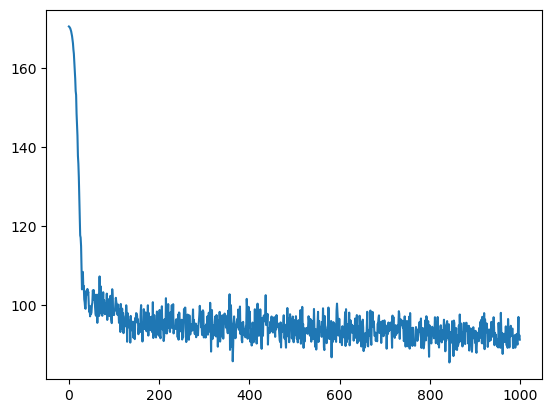

In [11]:
plt.plot(history.history['root_mean_squared_error'])
plt.show()

In [12]:
from sklearn.metrics import r2_score

r2_score(y, nn(X))

0.16198128963699954

## Integrated gradients

In [13]:
baseline = np.zeros(X.shape[1])
baseline

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
def interpolate(x, baseline, alpha):
    delta = x - baseline
    return baseline + alpha * delta

In [15]:
for alpha in np.linspace(0, 1, 11):
    print(interpolate(X.iloc[0, :], baseline, alpha))

age    0.0
sex    0.0
bmi    0.0
bp     0.0
s1     0.0
s2     0.0
s3     0.0
s4     0.0
s5     0.0
s6     0.0
Name: 0, dtype: float64
age    0.003808
sex    0.005068
bmi    0.006170
bp     0.002187
s1    -0.004422
s2    -0.003482
s3    -0.004340
s4    -0.000259
s5     0.001991
s6    -0.001765
Name: 0, dtype: float64
age    0.007615
sex    0.010136
bmi    0.012339
bp     0.004374
s1    -0.008845
s2    -0.006964
s3    -0.008680
s4    -0.000518
s5     0.003981
s6    -0.003529
Name: 0, dtype: float64
age    0.011423
sex    0.015204
bmi    0.018509
bp     0.006562
s1    -0.013267
s2    -0.010446
s3    -0.013020
s4    -0.000778
s5     0.005972
s6    -0.005294
Name: 0, dtype: float64
age    0.015230
sex    0.020272
bmi    0.024678
bp     0.008749
s1    -0.017689
s2    -0.013928
s3    -0.017360
s4    -0.001037
s5     0.007963
s6    -0.007058
Name: 0, dtype: float64
age    0.019038
sex    0.025340
bmi    0.030848
bp     0.010936
s1    -0.022112
s2    -0.017410
s3    -0.021700
s4    -0.001296
s5

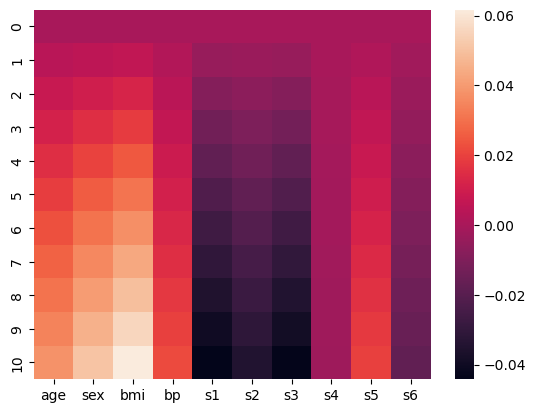

In [16]:
alphas = np.linspace(0, 1, 11)

interpolated = pd.Series(alphas).apply(lambda alpha: interpolate(X.iloc[0, :], baseline, alpha))

sns.heatmap(interpolated)
plt.show()

In [17]:
def average_gradients(baseline, x, n_alphas):
    gradients = pd.DataFrame(np.zeros((n_alphas, X.shape[1])))

    prev_x = pd.DataFrame(baseline, index=X.columns).T
    prev_pred = nn(prev_x)
    for i, alpha in enumerate(np.linspace(0, 1, n_alphas + 1)[1:]):
        new_x = interpolate(x, baseline, alpha)
        new_pred = nn(new_x)

        gradient = (new_pred - prev_pred) / (new_x - prev_x)
        gradients.iloc[i, :] = gradient.numpy()[0]

        prev_x, prev_pred = new_x, new_pred
    
    return(gradients.mean())
    
average_gradients(baseline, X.iloc[[0], :], 10)

0     345.421512
1     259.514706
2     213.177411
3     601.316992
4    -297.403812
5    -377.712476
6    -303.041019
7   -5073.652783
8     660.667914
9    -745.332849
dtype: float64

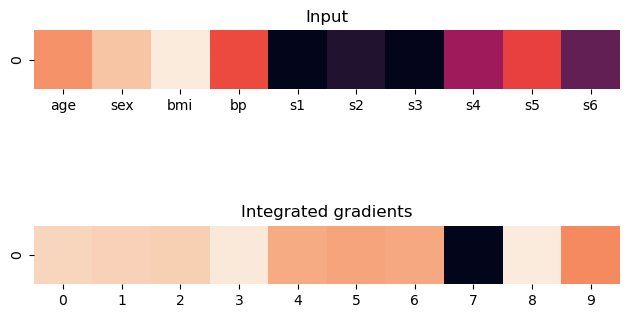

In [18]:
patient_n = 0

fig, ax = plt.subplots(2, 1)
sns.heatmap(X.iloc[[patient_n], :], cbar=False, square=True, ax=ax[0])
sns.heatmap(pd.DataFrame(average_gradients(baseline, X.iloc[[patient_n], :], 10)).T, cbar=False, square=True, ax=ax[1])
ax[0].set_title('Input')
ax[1].set_title('Integrated gradients')
plt.tight_layout()
plt.show()

In [19]:
X_gradients = []

for i in range(X.shape[0]):
    ag = average_gradients(baseline, X.iloc[[i], :], 10)
    X_gradients.append(ag)

X_gradients = pd.DataFrame(X_gradients)
X_gradients.columns = X.columns
X_gradients

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,345.421512,259.514706,213.177411,601.316992,-297.403812,-377.712476,-303.041019,-5073.652783,660.667914,-745.332849
1,17112.687717,721.442240,625.681410,1223.296075,3811.979167,1680.623576,-432.813928,815.487569,471.324931,349.294457
2,72.034951,121.240881,138.230260,-1083.605821,-134.749478,-179.692893,-189.903427,-2370.324734,2147.444309,-236.961897
3,-17.450972,-34.815814,-134.043364,-42.400464,127.494854,62.192794,-43.128181,45.301268,68.505480,-166.016830
4,-1789.482246,215.782652,264.751197,-440.413344,-2448.095052,-617.645806,-1183.098972,3716.017470,301.144145,206.533242
...,...,...,...,...,...,...,...,...,...,...
437,347.202545,285.738814,736.528314,242.389840,-2541.994032,-5642.485840,-505.026442,-5586.348199,464.253571,2009.469835
438,225.429264,-24.529185,78.154247,18.378327,-25.194757,-15.703122,43.353883,-36.233848,68.629962,-27.944894
439,-107.435616,-88.416767,281.711182,-259.114695,119.992611,323.773990,179.291565,404.437412,95.578710,-289.267985
440,-283.230255,-288.501556,329.709961,10597.709744,789.241577,842.713392,-449.154229,484.915809,289.233063,-496.683845


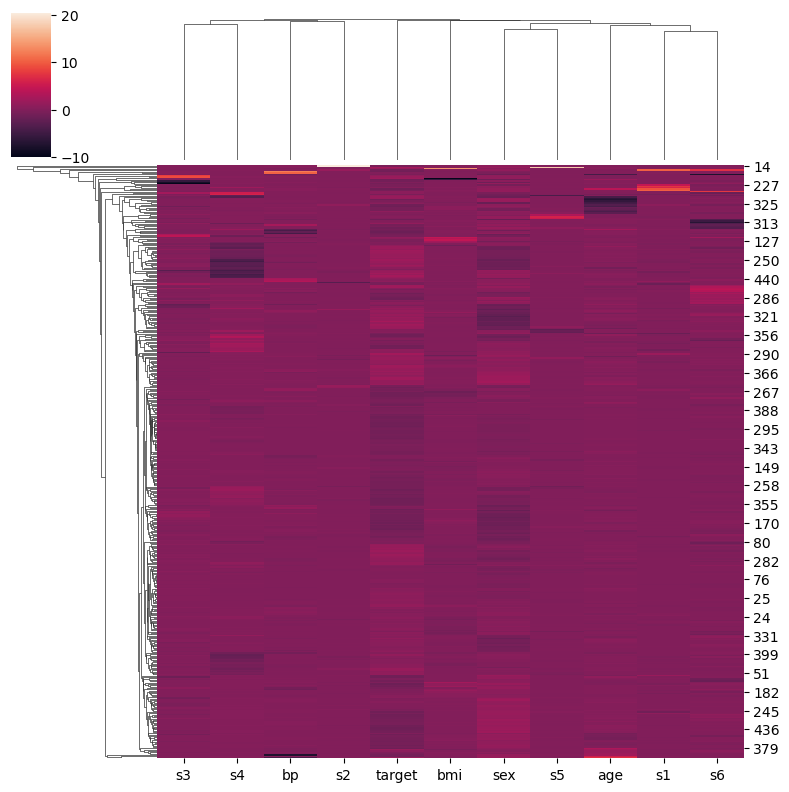

In [20]:
sns.clustermap(pd.concat([X_gradients, y], axis=1), z_score=1, figsize=(8, 8))
plt.show()